In [ ]:
import h5py
import sys
import time
sys.path.append("/users/munozr/mycodes")
import numpy as np
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from data_analysis_codes.tools import LinData
from matplotlib.collections import LineCollection
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [2]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CPunc_MR')
Lin = LinData.LinData_Class(param)
all_h5it = RRead.collect_h5iteration(Lin.param)
all_h5it = all_h5it[0::2]

 read time file


In [3]:
mpl.rcParams['font.size'] = 30

512
64 0 512 8
65 128 388 4
61 196 318 2
53 230 283 1


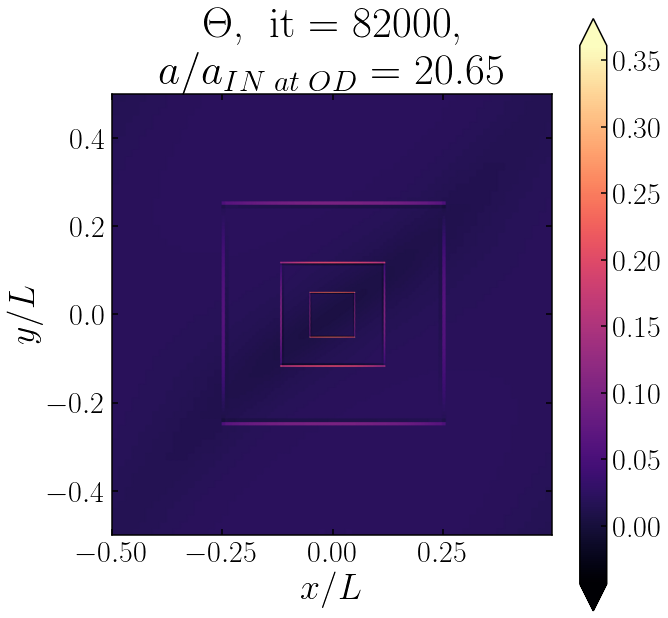

In [8]:
L = 1206
s = 185
cent = 0.0

allit = np.append(np.arange(0, 73600, 200), 
                  np.arange(73800, 120000, 200))

for it in [82000]:#RRead.progressbar(allit):#allit:
    f = h5py.File(param['h5datapath']+param['simname']+'_it_{:06d}.hdf5'.format(it),'r')
    d0 = np.array(f['COFLUID::theta it={:06d} rl=0'.format(it)])
    d1 = np.array(f['COFLUID::theta it={:06d} rl=1'.format(it)])#[3:-3, 3:-3, 3:-3]
    d2 = np.array(f['COFLUID::theta it={:06d} rl=2'.format(it)])#[3:-3, 3:-3, 3:-3]
    d3 = np.array(f['COFLUID::theta it={:06d} rl=3'.format(it)])#[3:-3, 3:-3, 3:-3]
    data = [d0, d1, d2, d3]
    tauOD = np.array(f['COSMOLAPSE::tau it={} tl=0 rl=0'.format(it)])[16,16,16]
    f.close()

    N = [np.shape(d)[0] for d in data]
    dx = L/N[0]

    xbig = np.arange(-L/2, L/2, dx/(2**(len(data)-1))) / L
    Nbig = len(xbig)
    big_data = np.zeros((Nbig, Nbig, Nbig))
    print(Nbig)
    for rl in range(len(data)):
        dxg = dx/(2**rl)
        Lg = N[rl]*dxg
        xmin = (-Lg/2 + (dxg/2)*(N[rl]%2))/L
        imin = np.argmin(abs(xbig - xmin))
        nrepeat = 2**(3-rl)
        imax = imin + N[rl]*nrepeat
        big_data[imin:imax, imin:imax, imin:imax] = np.repeat(np.repeat(np.repeat(
            data[rl], nrepeat, axis=0), nrepeat, axis=1), nrepeat, axis=2)
        print(N[rl], imin, imax, nrepeat)
    #big_data = np.log(abs(big_data))
    
    #vmin = np.max([np.min(big_data), -9.99])
    vmin = np.min(big_data)
    vmax = np.max(big_data)

    plt.figure(figsize=(10,10))
    
    plt.pcolormesh(xbig, xbig, big_data[:,:,int(Nbig/2)], 
                   vmin=vmin, vmax=vmax, shading='gouraud')
    
    plt.colorbar(format='%.2f', extend='both')
    plt.xlabel(r'$x/L$')
    plt.ylabel(r'$y/L$')
    #plt.title(r'$\log(|\Theta|)$,$\;$ it = {},$\;$ '.format(it)
    #          + '\n' + r'$a/a_{IN \; at \; OD}$ = ' + '{:.2f}'.format(Lin32.an_initial(tauOD)))
    plt.title(r'$\Theta$,$\;$ it = {},$\;$ '.format(it)
              + '\n' + r'$a/a_{IN \; at \; OD}$ = ' + '{:.2f}'.format(Lin.an_initial(tauOD)))
              
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    
    #plt.savefig('/users/munozr/simulations/' + param['simname'] + '/Theta_it={:06d}'.format(it))
    #plt.close(plt.gcf())

In [6]:
N

[64, 59, 55, 47]

In [13]:
ffmpeg -framerate 5 -pattern_type glob -i '*.png'   -c:v libx264 -r 30 Theta.mp4
ffmpeg -framerate 5 -pattern_type glob -i '*.png'   -c:v libx264 -r 30 log_abs_Theta.mp4

"ERROR: RRead.BASH('ffmpeg -framerate 5 -pattern_type glob -i '/users/munozr/simulations/pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CPunc_MR/*.png'   -c:v libx264 -r 30 /users/munozr/simulations/pflrw_d3e2_L1206_t1_N32_EdS_GRH_spin_CPunc_MR/Theta.mp4') did not work"

In [22]:
N

[32, 64, 45, 29]